In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [15]:
test = pd.read_csv('D:\JOB\kaggle1\ggg.csv')

In [16]:
train = pd.read_csv('D:\JOB\kaggle1\hhh.csv')

In [17]:
test.head()

,ID,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,1,2015-08-22,Lazio,Bologna,1.50,4.20,7.00,1.5,3.8,7.0,...,6.10,1.44,4.33,7.50,1.5,4.0,7.00,1.45,4.50,8.00
1,2,2015-08-22,Verona,Roma,5.50,3.75,1.67,5.0,3.6,1.7,...,1.75,5.25,3.75,1.67,5.0,3.5,1.73,5.50,3.70,1.75
2,3,2015-08-23,Empoli,Chievo,2.15,3.25,3.60,2.2,3.1,3.4,...,3.00,2.10,3.20,3.75,2.2,3.1,3.50,2.20,3.13,4.00
3,4,2015-08-23,Fiorentina,Milan,2.15,3.40,3.50,2.2,3.1,3.4,...,2.90,2.15,3.40,3.40,2.2,3.1,3.50,2.15,3.40,3.75
4,5,2015-08-23,Frosinone,Torino,3.50,3.25,2.20,3.4,3.1,2.2,...,2.30,3.40,3.20,2.20,3.4,3.1,2.25,3.75,3.13,2.25


In [18]:
train.head()

,ID,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,611,2013-08-24,Sampdoria,Juventus,A,8.00,4.00,1.45,7.25,4.00,...,1.55,6.00,4.00,1.53,7.00,4.00,1.50,7.50,4.0,1.55
1,612,2013-08-24,Verona,Milan,H,4.75,3.60,1.75,4.75,3.75,...,1.70,4.80,3.60,1.75,4.75,3.60,1.75,4.80,3.6,1.80
2,613,2013-08-25,Cagliari,Atalanta,H,2.50,3.00,3.00,2.45,3.10,...,3.00,2.37,3.20,3.00,2.50,3.00,3.00,2.55,3.2,3.10
3,614,2013-08-25,Inter,Genoa,H,1.62,3.75,5.50,1.60,3.75,...,4.90,1.61,3.75,5.50,1.70,3.75,4.80,1.67,3.9,5.75
4,615,2013-08-25,Lazio,Udinese,H,2.00,3.40,3.75,1.95,3.40,...,3.80,1.85,3.50,4.20,2.00,3.40,3.75,2.00,3.4,4.10


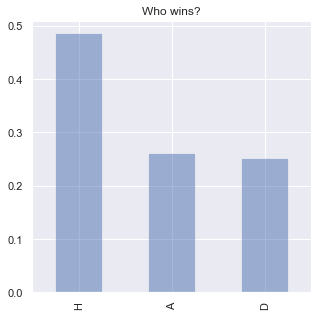

In [19]:
fig=plt.figure(figsize=(5,5))
plt.subplot2grid((1,1),(0,0))
train.FTR.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Who wins?')

plt.show()

In [20]:
train.isnull().sum()

ID           0
Date         0
HomeTeam     0
AwayTeam     0
FTR          0
B365H        3
B365D        3
B365A        3
BWH         15
BWD         15
BWA         15
IWH         16
IWD         16
IWA         16
LBH          5
LBD          5
LBA          5
WHH          6
WHD          6
WHA          6
VCH         19
VCD         19
VCA         19
dtype: int64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 23 columns):
ID          1520 non-null int64
Date        1520 non-null object
HomeTeam    1520 non-null object
AwayTeam    1520 non-null object
FTR         1520 non-null object
B365H       1517 non-null float64
B365D       1517 non-null float64
B365A       1517 non-null float64
BWH         1505 non-null float64
BWD         1505 non-null float64
BWA         1505 non-null float64
IWH         1504 non-null float64
IWD         1504 non-null float64
IWA         1504 non-null float64
LBH         1515 non-null float64
LBD         1515 non-null float64
LBA         1515 non-null float64
WHH         1514 non-null float64
WHD         1514 non-null float64
WHA         1514 non-null float64
VCH         1501 non-null float64
VCD         1501 non-null float64
VCA         1501 non-null float64
dtypes: float64(18), int64(1), object(4)
memory usage: 273.2+ KB


In [22]:
train['FTR'].value_counts()

H    738
A    398
D    384
Name: FTR, dtype: int64

In [23]:
def clean_data(train):
    
    train['B365H'] = train['B365H'].fillna(train['B365H'].dropna().median())
    train['B365D'] = train['B365D'].fillna(train['B365D'].dropna().median())
    train['B365A'] = train['B365A'].fillna(train['B365A'].dropna().median())
    train['BWH'] = train['BWH'].fillna(train['BWH'].dropna().median())
    train['BWD'] = train['BWD'].fillna(train['BWD'].dropna().median())
    train['BWA'] = train['BWA'].fillna(train['BWA'].dropna().median())
    train['IWH'] = train['IWH'].fillna(train['IWH'].dropna().median())                                  
    train['IWD'] = train['IWD'].fillna(train['IWD'].dropna().median())                                   
    train['IWA'] = train['IWA'].fillna(train['IWA'].dropna().median())                                   
    train['LBH'] = train['LBH'].fillna(train['LBH'].dropna().median())
    train['LBD'] = train['LBD'].fillna(train['LBD'].dropna().median())                                   
    train['LBA'] = train['LBA'].fillna(train['LBA'].dropna().median())                                   
    train['WHH'] = train['WHH'].fillna(train['WHH'].dropna().median())                                   
    train['WHD'] = train['WHD'].fillna(train['WHD'].dropna().median())                                   
    train['WHA'] = train['WHA'].fillna(train['WHA'].dropna().median())                                    
    train['VCH'] = train['VCH'].fillna(train['VCH'].dropna().median())                                   
    train['VCA'] = train['VCA'].fillna(train['VCA'].dropna().median()) 
    train['VCD'] = train['VCD'].fillna(train['VCD'].dropna().median())                                    

clean_data(train)

In [24]:
train['HomeTeam'].value_counts()

Cagliari      76
Roma          76
Fiorentina    76
Udinese       76
Sampdoria     76
Napoli        76
Milan         76
Chievo        76
Genoa         76
Inter         76
Lazio         76
Bologna       76
Juventus      76
Catania       76
Palermo       57
Parma         57
Atalanta      57
Bari          38
Siena         38
Livorno       38
Torino        38
Lecce         38
Reggina       19
Verona        19
Cesena        19
Sassuolo      19
Brescia       19
Name: HomeTeam, dtype: int64

In [25]:
test['HomeTeam'].value_counts()

Verona        31
Inter         31
Palermo       31
Sampdoria     31
Torino        31
Fiorentina    31
Lazio         31
Empoli        30
Juventus      30
Atalanta      30
Roma          30
Chievo        30
Udinese       30
Napoli        30
Sassuolo      30
Genoa         30
Milan         30
Cesena        19
Cagliari      19
Parma         19
Frosinone     12
Carpi         12
Bologna       12
Name: HomeTeam, dtype: int64

In [26]:
train.head()

,ID,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,611,2013-08-24,Sampdoria,Juventus,A,8.00,4.00,1.45,7.25,4.00,...,1.55,6.00,4.00,1.53,7.00,4.00,1.50,7.50,4.0,1.55
1,612,2013-08-24,Verona,Milan,H,4.75,3.60,1.75,4.75,3.75,...,1.70,4.80,3.60,1.75,4.75,3.60,1.75,4.80,3.6,1.80
2,613,2013-08-25,Cagliari,Atalanta,H,2.50,3.00,3.00,2.45,3.10,...,3.00,2.37,3.20,3.00,2.50,3.00,3.00,2.55,3.2,3.10
3,614,2013-08-25,Inter,Genoa,H,1.62,3.75,5.50,1.60,3.75,...,4.90,1.61,3.75,5.50,1.70,3.75,4.80,1.67,3.9,5.75
4,615,2013-08-25,Lazio,Udinese,H,2.00,3.40,3.75,1.95,3.40,...,3.80,1.85,3.50,4.20,2.00,3.40,3.75,2.00,3.4,4.10


In [27]:
from datetime import datetime

In [28]:
train['Date_dt'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
train['year'] = train['Date_dt'].dt.year
train['month'] = train['Date_dt'].dt.month
train['weekday'] = train['Date_dt'].dt.weekday

In [29]:
print(train['year'].value_counts(dropna=False))
print()
print(train['month'].value_counts(dropna=False))

2010    381
2009    377
2011    213
2014    210
2013    170
2008    169
Name: year, dtype: int64

1     184
3     178
2     175
11    169
9     168
4     163
10    161
5     148
12    122
8      52
Name: month, dtype: int64


In [30]:
train.head()

,ID,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,WHH,WHD,WHA,VCH,VCD,VCA,Date_dt,year,month,weekday
0,611,2013-08-24,Sampdoria,Juventus,A,8.00,4.00,1.45,7.25,4.00,...,7.00,4.00,1.50,7.50,4.0,1.55,2013-08-24,2013,8,5
1,612,2013-08-24,Verona,Milan,H,4.75,3.60,1.75,4.75,3.75,...,4.75,3.60,1.75,4.80,3.6,1.80,2013-08-24,2013,8,5
2,613,2013-08-25,Cagliari,Atalanta,H,2.50,3.00,3.00,2.45,3.10,...,2.50,3.00,3.00,2.55,3.2,3.10,2013-08-25,2013,8,6
3,614,2013-08-25,Inter,Genoa,H,1.62,3.75,5.50,1.60,3.75,...,1.70,3.75,4.80,1.67,3.9,5.75,2013-08-25,2013,8,6
4,615,2013-08-25,Lazio,Udinese,H,2.00,3.40,3.75,1.95,3.40,...,2.00,3.40,3.75,2.00,3.4,4.10,2013-08-25,2013,8,6


In [31]:
train['Combined_away'] = train[['B365A','BWA','IWA','LBA', 'WHA','VCA']].fillna('').mean(axis=1)
train['Combined_draw'] = train[['B365D','BWD','IWD','LBD', 'WHD','VCD']].fillna('').mean(axis=1)
train['Combined_home'] = train[['B365H','BWH','IWH','LBH', 'WHH','VCH']].fillna('').mean(axis=1)
train

,ID,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,VCH,VCD,VCA,Date_dt,year,month,weekday,Combined_away,Combined_draw,Combined_home
0,611,2013-08-24,Sampdoria,Juventus,A,8.00,4.00,1.45,7.25,4.00,...,7.50,4.0,1.55,2013-08-24,2013,8,5,1.510000,4.000000,6.875000
1,612,2013-08-24,Verona,Milan,H,4.75,3.60,1.75,4.75,3.75,...,4.80,3.6,1.80,2013-08-24,2013,8,5,1.741667,3.625000,4.758333
2,613,2013-08-25,Cagliari,Atalanta,H,2.50,3.00,3.00,2.45,3.10,...,2.55,3.2,3.10,2013-08-25,2013,8,6,3.016667,3.116667,2.445000
3,614,2013-08-25,Inter,Genoa,H,1.62,3.75,5.50,1.60,3.75,...,1.67,3.9,5.75,2013-08-25,2013,8,6,5.366667,3.766667,1.641667
4,615,2013-08-25,Lazio,Udinese,H,2.00,3.40,3.75,1.95,3.40,...,2.00,3.4,4.10,2013-08-25,2013,8,6,3.916667,3.425000,1.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2126,2011-05-22,Juventus,Napoli,D,1.90,3.60,3.80,1.90,3.40,...,1.91,3.5,3.75,2011-05-22,2011,5,6,3.800000,3.383333,1.898333
1516,2127,2011-05-22,Lecce,Lazio,A,6.00,3.60,1.60,5.50,3.65,...,6.00,3.5,1.62,2011-05-22,2011,5,6,1.550000,3.666667,5.916667
1517,2128,2011-05-22,Palermo,Chievo,A,1.75,3.50,4.75,1.75,3.45,...,1.75,3.4,4.60,2011-05-22,2011,5,6,4.513333,3.375000,1.746667
1518,2129,2011-05-22,Roma,Sampdoria,H,1.29,5.00,11.00,1.28,5.25,...,2.10,3.3,3.70,2011-05-22,2011,5,6,9.116667,4.758333,1.406667


In [32]:
train=train.drop(['Date','Date_dt','month','weekday','B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','WHH','WHD','WHA','VCH','VCD','VCA'], axis=1)

In [33]:
Home_Team=pd.get_dummies(train['HomeTeam'], prefix='Home', dummy_na=False)

In [34]:
Home_Team.head()

,Home_Atalanta,Home_Bari,Home_Bologna,Home_Brescia,Home_Cagliari,Home_Catania,Home_Cesena,Home_Chievo,Home_Fiorentina,Home_Genoa,...,Home_Palermo,Home_Parma,Home_Reggina,Home_Roma,Home_Sampdoria,Home_Sassuolo,Home_Siena,Home_Torino,Home_Udinese,Home_Verona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train=pd.concat([Home_Team, train], axis=1)

In [36]:
Away_Team=pd.get_dummies(train['AwayTeam'], prefix='Away', dummy_na=False)

In [37]:
train=pd.concat([Away_Team, train], axis=1)

In [38]:
train.head()

,Away_Atalanta,Away_Bari,Away_Bologna,Away_Brescia,Away_Cagliari,Away_Catania,Away_Cesena,Away_Chievo,Away_Fiorentina,Away_Genoa,...,Home_Udinese,Home_Verona,ID,HomeTeam,AwayTeam,FTR,year,Combined_away,Combined_draw,Combined_home
0,0,0,0,0,0,0,0,0,0,0,...,0,0,611,Sampdoria,Juventus,A,2013,1.510000,4.000000,6.875000
1,0,0,0,0,0,0,0,0,0,0,...,0,1,612,Verona,Milan,H,2013,1.741667,3.625000,4.758333
2,1,0,0,0,0,0,0,0,0,0,...,0,0,613,Cagliari,Atalanta,H,2013,3.016667,3.116667,2.445000
3,0,0,0,0,0,0,0,0,0,1,...,0,0,614,Inter,Genoa,H,2013,5.366667,3.766667,1.641667
4,0,0,0,0,0,0,0,0,0,0,...,0,0,615,Lazio,Udinese,H,2013,3.916667,3.425000,1.950000


In [39]:
def clean_data(test):
    test['B365H'] = test['B365H'].fillna(test['B365H'].dropna().median())
    test['B365D'] = test['B365D'].fillna(test['B365D'].dropna().median())
    test['B365A'] = test['B365A'].fillna(test['B365A'].dropna().median())
    test['BWH'] = test['BWH'].fillna(test['BWH'].dropna().median())
    test['BWD'] = test['BWD'].fillna(test['BWD'].dropna().median())
    test['BWA'] = test['BWA'].fillna(test['BWA'].dropna().median())
    test['IWH'] = test['IWH'].fillna(test['IWH'].dropna().median())                                  
    test['IWD'] = test['IWD'].fillna(test['IWD'].dropna().median())                                   
    test['IWA'] = test['IWA'].fillna(test['IWA'].dropna().median())                                   
    test['LBH'] = test['LBH'].fillna(test['LBH'].dropna().median())
    test['LBD'] = test['LBD'].fillna(test['LBD'].dropna().median())                                   
    test['LBA'] = test['LBA'].fillna(test['LBA'].dropna().median())                                   
    test['WHH'] = test['WHH'].fillna(test['WHH'].dropna().median())                                   
    test['WHD'] = test['WHD'].fillna(test['WHD'].dropna().median())                                   
    test['WHA'] = test['WHA'].fillna(test['WHA'].dropna().median())                                    
    test['VCH'] = test['VCH'].fillna(test['VCH'].dropna().median())                                   
    test['VCA'] = test['VCA'].fillna(test['VCA'].dropna().median()) 
    test['VCD'] = test['VCD'].fillna(test['VCD'].dropna().median())
    
clean_data(test)

In [40]:
test['Date_dt'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
test['year'] = test['Date_dt'].dt.year
test['month'] = test['Date_dt'].dt.month
test['weekday'] = test['Date_dt'].dt.weekday

In [41]:
test['Combined_away'] = test[['B365A','BWA','IWA','LBA', 'WHA','VCA']].fillna('').mean(axis=1)
test['Combined_draw'] = test[['B365D','BWD','IWD','LBD', 'WHD','VCD']].fillna('').mean(axis=1)
test['Combined_home'] = test[['B365H','BWH','IWH','LBH', 'WHH','VCH']].fillna('').mean(axis=1)

In [42]:
test=test.drop(['Date','Date_dt','month','weekday','B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','WHH','WHD','WHA','VCH','VCD','VCA'], axis=1)

In [43]:
Home_Team=pd.get_dummies(test['HomeTeam'], prefix='Home', dummy_na=False)

In [44]:
test=pd.concat([Home_Team, test], axis=1)

In [45]:
Away_Team=pd.get_dummies(test['AwayTeam'], prefix='Away', dummy_na=False)

In [46]:
test=pd.concat([Away_Team, test], axis=1)

In [47]:
test.head()

,Away_Atalanta,Away_Bologna,Away_Cagliari,Away_Carpi,Away_Cesena,Away_Chievo,Away_Empoli,Away_Fiorentina,Away_Frosinone,Away_Genoa,...,Home_Torino,Home_Udinese,Home_Verona,ID,HomeTeam,AwayTeam,year,Combined_away,Combined_draw,Combined_home
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,Lazio,Bologna,2015,7.100000,4.138333,1.481667
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,Verona,Roma,2015,1.711667,3.633333,5.125000
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,3,Empoli,Chievo,2015,3.541667,3.163333,2.191667
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,Fiorentina,Milan,2015,3.408333,3.283333,2.191667
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,Frosinone,Torino,2015,2.233333,3.180000,3.391667


In [48]:
train.drop(['HomeTeam','AwayTeam','ID'], axis=1, inplace=True)
test.drop(['HomeTeam','AwayTeam'], axis=1, inplace=True)

In [49]:
train.loc[train['year']<=2010, 'year'] = 0,
train.loc[(train['year']>2010) & (train['year']<=2012), 'year'] = 1,
train.loc[train['year']>2012, 'year'] = 2
test.loc[test['year']==2014, 'year'] = 0,
test.loc[test['year']==2015, 'year'] = 1,
test.loc[test['year']==2016, 'year'] = 2

In [50]:
train.head()

,Away_Atalanta,Away_Bari,Away_Bologna,Away_Brescia,Away_Cagliari,Away_Catania,Away_Cesena,Away_Chievo,Away_Fiorentina,Away_Genoa,...,Home_Sassuolo,Home_Siena,Home_Torino,Home_Udinese,Home_Verona,FTR,year,Combined_away,Combined_draw,Combined_home
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,A,2,1.510000,4.000000,6.875000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,H,2,1.741667,3.625000,4.758333
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,H,2,3.016667,3.116667,2.445000
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,H,2,5.366667,3.766667,1.641667
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,H,2,3.916667,3.425000,1.950000


In [51]:
test.head()

,Away_Atalanta,Away_Bologna,Away_Cagliari,Away_Carpi,Away_Cesena,Away_Chievo,Away_Empoli,Away_Fiorentina,Away_Frosinone,Away_Genoa,...,Home_Sampdoria,Home_Sassuolo,Home_Torino,Home_Udinese,Home_Verona,ID,year,Combined_away,Combined_draw,Combined_home
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,7.100000,4.138333,1.481667
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,1,1.711667,3.633333,5.125000
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,1,3.541667,3.163333,2.191667
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,1,3.408333,3.283333,2.191667
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1,2.233333,3.180000,3.391667


In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [53]:
target=train['FTR']
train_data=train.drop(['FTR'], axis=1)

In [54]:
train_data.drop(['Home_Lecce','Home_Livorno','Home_Reggina', 'Home_Siena','Away_Lecce','Away_Livorno','Away_Reggina', 'Away_Siena'], axis=1, inplace=True)

In [55]:
train_data.head()

,Away_Atalanta,Away_Bari,Away_Bologna,Away_Brescia,Away_Cagliari,Away_Catania,Away_Cesena,Away_Chievo,Away_Fiorentina,Away_Genoa,...,Home_Roma,Home_Sampdoria,Home_Sassuolo,Home_Torino,Home_Udinese,Home_Verona,year,Combined_away,Combined_draw,Combined_home
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,1.510000,4.000000,6.875000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,1.741667,3.625000,4.758333
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3.016667,3.116667,2.445000
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,5.366667,3.766667,1.641667
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3.916667,3.425000,1.950000


In [56]:
test.head()

,Away_Atalanta,Away_Bologna,Away_Cagliari,Away_Carpi,Away_Cesena,Away_Chievo,Away_Empoli,Away_Fiorentina,Away_Frosinone,Away_Genoa,...,Home_Sampdoria,Home_Sassuolo,Home_Torino,Home_Udinese,Home_Verona,ID,year,Combined_away,Combined_draw,Combined_home
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,7.100000,4.138333,1.481667
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,1,1.711667,3.633333,5.125000
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,1,3.541667,3.163333,2.191667
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,1,3.408333,3.283333,2.191667
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1,2.233333,3.180000,3.391667


In [57]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier(n_neighbors=10)
score=cross_val_score(neighbor, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.47368421 0.49342105 0.45394737 0.48026316 0.43421053 0.54605263
 0.48026316 0.53289474 0.40131579 0.54605263]


In [58]:
score.mean()

0.48421052631578937

In [59]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
score=cross_val_score(tree, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.48684211 0.375      0.42105263 0.44078947 0.42763158 0.50657895
 0.40789474 0.46052632 0.47368421 0.5       ]


In [60]:
score.mean()

0.45

In [61]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=10)
score=cross_val_score(forest, train_data,target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.46052632 0.43421053 0.45394737 0.48684211 0.42105263 0.53947368
 0.44078947 0.44736842 0.42763158 0.42763158]


In [62]:
score.mean()

0.45394736842105254

In [63]:
#testing
best_model=KNeighborsClassifier()
best_model.fit(train_data,target)

test_data=test.drop('ID', axis=1).copy()
prediction=best_model.predict(test_data)

In [64]:
submission=pd.DataFrame({'ID':test['ID'],'FTR':prediction})
submission.to_csv('submission.csv',index=False)

In [65]:
submission=pd.read_csv('D:\JOB\kaggle1\submission.csv')